## Introduction
Protein interaction data plays a crucial role in comprehending the intricate relationships between gene-encoded biomolecules, enabling us to gain insight into cellular function and predict therapeutic possibilities. Several databases store protein interaction data, with STRING being one of the most prominent. At present, STRING encompasses over 3.1 billion interactions, involving 20 million proteins across 5,000 organisms, thereby offering a comprehensive resource for exploring protein-protein interactions. 
Centrality measures are a set of network analysis techniques used to identify the most important nodes in a network.We will apply centrality measures on the String dataset and find gather insights about the data. 

In [1]:
# The required libraries and packages #
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Fetching the Dataset
We will use the STRING database API to retrieve a protein interaction network for a list of human proteins. This code uses the STRING database API to retrieve a protein interaction network for a list of human proteins.We make a list of human protein names.We use the join() method to combine the protein names into a string separated by %0d (a URL-encoded newline character). The resulting string is stored in the proteins variable. A URL is constructed using the proteins string and a species identifier for human (9606). The requests module is used to send a GET request to the URL, and the response is stored in the r variable. The list of proteins was selected from a larger set of human proteins related to serotonin. 9606 is the species number for humans. Dataset Source :- https://string-db.org/cgi/about?footer_active_subpage=references
## About the Dataset
The STRING database is a biological database and web resource of known and predicted protein interactions, including both direct physical interactions and indirect functional associations. The interactions are derived from multiple sources, including high-throughput experiments, co-expression analysis, and text mining of the scientific literature. The database covers a wide range of organisms, including bacteria, archaea, and eukaryotes.
The STRING database provides users with several tools for visualizing and analyzing protein interaction networks. Users can search for individual proteins and view their known interactions, or upload their own list of proteins to generate a custom interaction network. The database also provides tools for analyzing the functional enrichment of proteins in a network, predicting protein interactions based on sequence similarity, and comparing different protein networks.

In [2]:
protein_list = ['TPH1','COMT','SLC18A2','HTR1B','HTR2C','HTR2A','MAOA',
            'TPH2','HTR1A','HTR7','SLC6A4','GABBR2','POMC','GNAI3',
            'NPY','ADCY1','PDYN','GRM2','GRM3','GABBR1']
proteins = '%0d'.join(protein_list)
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

In [3]:
lines = r.text.split('\n') # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines] # split each line into its components based on tabs
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) 

In [7]:
df.head(n=10)

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000250018,9606.ENSP00000378492,TPH1,GRM2,9606,0.411,0,0,0,0.063,0,0,0.398
1,9606.ENSP00000250018,9606.ENSP00000378492,TPH1,GRM2,9606,0.411,0,0,0,0.063,0,0,0.398
2,9606.ENSP00000250018,9606.ENSP00000384092,TPH1,POMC,9606,0.439,0,0,0,0.062,0,0,0.427
3,9606.ENSP00000250018,9606.ENSP00000384092,TPH1,POMC,9606,0.439,0,0,0,0.062,0,0,0.427
4,9606.ENSP00000250018,9606.ENSP00000384364,TPH1,NPY,9606,0.458,0,0,0,0,0,0,0.458
5,9606.ENSP00000250018,9606.ENSP00000384364,TPH1,NPY,9606,0.458,0,0,0,0,0,0,0.458
6,9606.ENSP00000250018,9606.ENSP00000354511,TPH1,COMT,9606,0.684,0,0,0,0.052,0,0,0.681
7,9606.ENSP00000250018,9606.ENSP00000354511,TPH1,COMT,9606,0.684,0,0,0,0.052,0,0,0.681
8,9606.ENSP00000250018,9606.ENSP00000358963,TPH1,HTR1B,9606,0.716,0,0,0,0,0,0,0.716
9,9606.ENSP00000250018,9606.ENSP00000358963,TPH1,HTR1B,9606,0.716,0,0,0,0,0,0,0.716


In [ ]:
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions = df[['preferredName_A', 'preferredName_B', 'score']] 

In [32]:
interactions[:5] 

array([['TPH1', 'GRM2', '0.411'],
       ['TPH1', 'GRM2', '0.411'],
       ['TPH1', 'POMC', '0.439'],
       ['TPH1', 'POMC', '0.439'],
       ['TPH1', 'NPY', '0.458']], dtype=object)

## Construction of Graph using NetworkX
Now we will construct a protein interaction graph using the NetworkX library.We create a new empty graph G is created using the NetworkX Graph class, with a name attribute set to 'Protein Interaction Graph'.
The code iterates through each row of the interactions array. For each row, it extracts the two proteins involved in the interaction (a and b) and the weight of the interaction (w). The weight is stored as a float, and represents the strength of the interaction, with higher scores indicating weaker interactions.
Overall, this code constructs a protein interaction graph using the NetworkX library, where nodes represent proteins and edges represent interactions between proteins. The edges are weighted based on the strength of the interaction, with higher weights indicating weaker interactions.





In [4]:
G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

In [18]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 20
Number of edges: 102


## Visualizing Network

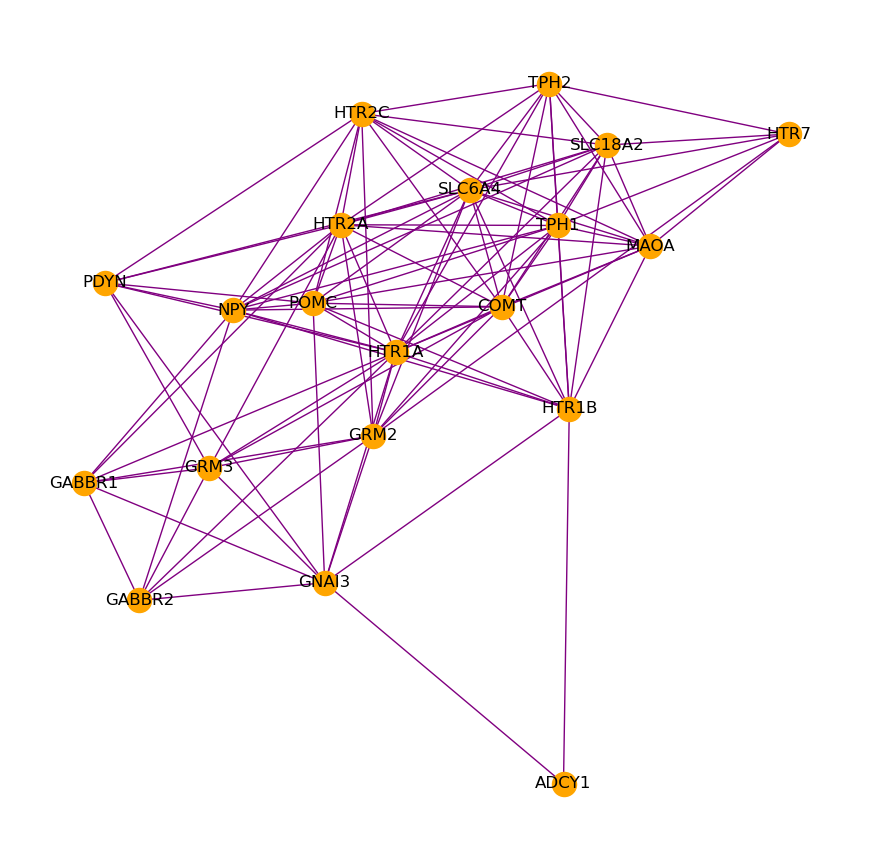

In [20]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11, 11), facecolor='white')
nx.draw_networkx(G, node_color='orange', edge_color='purple')
plt.axis('off')
plt.show()

## Finding Centrality Measures for the Protein-Protein Network
Finding centrality measures for a protein-protein interaction (PPI) network dataset can give various insights on the protein-protein network.
1) Identifying highly connected nodes: Centrality measures can help identify highly connected nodes in the PPI network, which are often key regulators or hubs of the network. 

2) Predicting essential genes: We can identify essential genes in the PPI network, which are genes whose deletion or knockout would result in a lethal phenotype. Highly central genes are often essential genes, as they are required for maintaining the integrity of the network.

3) Identifying disease-associated genes: Centrality measures can help identify genes that are associated with disease or other phenotypic traits. Disease-associated genes are often highly central in PPI networks, as they are involved in key pathways or processes that are disrupted in disease.

4) Identifying important proteins: Centrality measures can be used to identify proteins that are most important in a PPI network. For example, proteins with high degree centrality are likely to be involved in many interactions and may play important roles in regulating cellular processes. Identifying these important proteins can help researchers better understand the underlying biology of a system.

5) Characterizing network structure: Centrality measures can also be used to characterize the overall structure of a PPI network. For example, networks with high clustering coefficient and low betweenness centrality are indicative of modular networks, where proteins tend to interact within well-defined modules. Understanding the network structure can provide insights into the functional organization of a biological system.

Overall, finding centrality measures for a PPI network dataset can provide valuable insights into the organization and function of the network, as well as its role in disease and other biological processes. These insights can help guide future research and drug development efforts.

## Degree Centrality 
The degree centrality for a node v is the fraction of nodes it is connected to. We find the degree centrality of our network to identify the most connected nodes.Check out the documentation for usage and examples :- https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality

In [23]:
nx.degree_centrality(G)

{'TPH1': 0.6842105263157894,
 'GRM2': 0.5789473684210527,
 'POMC': 0.5789473684210527,
 'NPY': 0.631578947368421,
 'COMT': 0.6842105263157894,
 'HTR1B': 0.5789473684210527,
 'SLC18A2': 0.5789473684210527,
 'HTR7': 0.3157894736842105,
 'HTR2C': 0.5789473684210527,
 'HTR2A': 0.7368421052631579,
 'TPH2': 0.5263157894736842,
 'MAOA': 0.5789473684210527,
 'HTR1A': 0.8421052631578947,
 'SLC6A4': 0.7368421052631579,
 'GABBR2': 0.3157894736842105,
 'GRM3': 0.42105263157894735,
 'GNAI3': 0.47368421052631576,
 'GABBR1': 0.3684210526315789,
 'PDYN': 0.42105263157894735,
 'ADCY1': 0.10526315789473684}

## Results
From the above calculations we can infer that TPH1, COMT, and SLC18A2 have the highest degree centrality, indicating that they are highly connected to other proteins in the network and are likely to be important hubs in the network, and their disruption may have significant effects on the overall network structure and function.
## Eigen Vector Centrality
Eigenvector centrality measures the influence of a node in the network based on the connections it has to other highly connected nodes in the network.
Check out the documentation for usage and examples :- https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality

In [25]:
centrality = nx.eigenvector_centrality(G)

In [26]:
sorted((v, f"{c:0.2f}") for v, c in centrality.items())

[('ADCY1', '0.03'),
 ('COMT', '0.29'),
 ('GABBR1', '0.13'),
 ('GABBR2', '0.10'),
 ('GNAI3', '0.14'),
 ('GRM2', '0.21'),
 ('GRM3', '0.14'),
 ('HTR1A', '0.31'),
 ('HTR1B', '0.23'),
 ('HTR2A', '0.29'),
 ('HTR2C', '0.24'),
 ('HTR7', '0.13'),
 ('MAOA', '0.25'),
 ('NPY', '0.25'),
 ('PDYN', '0.17'),
 ('POMC', '0.24'),
 ('SLC18A2', '0.25'),
 ('SLC6A4', '0.30'),
 ('TPH1', '0.28'),
 ('TPH2', '0.23')]

The results suggest that HTR1A, SLC6A4, and COMT are the most influential nodes in the network, as they have the highest eigenvector centrality scores. This indicates that they are connected to other highly connected nodes in the network and may play important roles in regulating the interactions among other proteins in the network.These proteins may be good candidates for further investigation as potential targets for drug development or as biomarkers for certain diseases. On the other hand, ADCY1 has the lowest eigenvector centrality score, indicating that it may be less influential in the network.
## Closeness Centrality
Closeness centrality of a node u is the reciprocal of the average shortest path distance to u over all n-1 reachable nodes. A high closeness centrality score indicates that a node is close to many other nodes and can easily interact with them.Check out the documentation for usage and examples :- https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality


In [30]:
nx.closeness_centrality(G)

{'TPH1': 0.76,
 'GRM2': 0.7037037037037037,
 'POMC': 0.7037037037037037,
 'NPY': 0.7307692307692307,
 'COMT': 0.76,
 'HTR1B': 0.7037037037037037,
 'SLC18A2': 0.7037037037037037,
 'HTR7': 0.5757575757575758,
 'HTR2C': 0.6785714285714286,
 'HTR2A': 0.76,
 'TPH2': 0.6785714285714286,
 'MAOA': 0.7037037037037037,
 'HTR1A': 0.8636363636363636,
 'SLC6A4': 0.7916666666666666,
 'GABBR2': 0.59375,
 'GRM3': 0.6333333333333333,
 'GNAI3': 0.6551724137931034,
 'GABBR1': 0.6129032258064516,
 'PDYN': 0.6333333333333333,
 'ADCY1': 0.48717948717948717}

## Results
In this PPIN, the nodes with the highest closeness centrality scores are TPH1, COMT, and HTR2A, with a score of 0.76 each. This suggests that these nodes are important in the network as they are well-connected and can easily influence or be influenced by other nodes. On the other hand, the node with the lowest closeness centrality score is ADCY1, with a score of 0.49, suggesting that it is less important in the network as it is less well-connected to other nodes.
## Information Centrality 
The information centrality is a measure that quantifies the influence of a node in a network based on the amount of information that passes through it. In a PPIN, this could be interpreted as the ability of a protein to transmit or receive signals from other proteins in the network.
Check out the documentation for usage and examples :- https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.information_centrality.html#networkx.algorithms.centrality.information_centrality

In [41]:
nx.information_centrality(G)

{'TPH1': 0.25771408969401505,
 'GRM2': 0.24273910981709484,
 'POMC': 0.24262951152255335,
 'NPY': 0.25203591025082284,
 'COMT': 0.2592356057342812,
 'HTR1B': 0.24247387514295937,
 'SLC18A2': 0.2398595723818333,
 'HTR7': 0.17606950825532133,
 'HTR2C': 0.24079788915620817,
 'HTR2A': 0.2670391866221025,
 'TPH2': 0.22957097824132255,
 'MAOA': 0.23962445762083207,
 'HTR1A': 0.28183102082164435,
 'SLC6A4': 0.26568878235519194,
 'GABBR2': 0.1747467563926582,
 'GRM3': 0.2058987553698088,
 'GNAI3': 0.2178370437809368,
 'GABBR1': 0.19134421867460746,
 'PDYN': 0.2089063433888903,
 'ADCY1': 0.08098293093490946}

## Results
TPH1, COMT, and HTR1A have relatively high information centrality values, suggesting that they are important in the flow of information in the PPIN. On the other hand, ADCY1 has a low information centrality value, indicating that it may have less influence in the flow of information in the network.
## Betweenness Centrality 
Betweenness centrality is a measure of the importance of a node in a network based on the number of shortest paths that pass through it.herefore, a node with high betweenness centrality is important in maintaining the connectivity of the network. Nodes with high betweenness centrality may be bottlenecks or bridges that connect different parts of the network. In contrast, nodes with low betweenness centrality are less important for maintaining the overall connectivity of the network.
Check out the documentation for usage and examples :-https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality

In [31]:
nx.betweenness_centrality(G)

{'TPH1': 0.020779220779220776,
 'GRM2': 0.056034024455077075,
 'POMC': 0.018203547589512502,
 'NPY': 0.03794481996236382,
 'COMT': 0.02487278803068277,
 'HTR1B': 0.07475338177092564,
 'SLC18A2': 0.012206863961249927,
 'HTR7': 0.0025062656641604004,
 'HTR2C': 0.013420124385036666,
 'HTR2A': 0.042509261368910485,
 'TPH2': 0.008876779490814578,
 'MAOA': 0.012206863961249927,
 'HTR1A': 0.086292119186856,
 'SLC6A4': 0.03438267385635806,
 'GABBR2': 0.002680311890838206,
 'GRM3': 0.010776942355889723,
 'GNAI3': 0.05720614667983088,
 'GABBR1': 0.005214424951267056,
 'PDYN': 0.011297182349813929,
 'ADCY1': 0.0}

## Result
In the given result, some nodes have relatively high betweenness centrality, such as 'HTR1A', 'HTR1B', 'GRM2', 'GNAI3', and 'HTR2A', which suggests that these nodes are important for maintaining the connectivity of the network. On the other hand, some nodes have low betweenness centrality, such as 'ADCY1', which suggests that these nodes are less important for maintaining the overall connectivity of the network.
## Edge Betweenness Centrality
We calculate the edge betweenness centrality for all edges in the network G, which is a measure of how much each edge contributes to the flow of information through the network. The higher the value of edge betweenness centrality, the more important that edge is for maintaining the connectedness of the network.

In [43]:
nx.edge_betweenness_centrality(G)

{('TPH1', 'GRM2'): 0.01568295739348371,
 ('TPH1', 'POMC'): 0.011205096073517126,
 ('TPH1', 'NPY'): 0.012865497076023392,
 ('TPH1', 'COMT'): 0.007456140350877194,
 ('TPH1', 'HTR1B'): 0.01689659755449229,
 ('TPH1', 'SLC18A2'): 0.0065998329156223895,
 ('TPH1', 'HTR7'): 0.014210526315789477,
 ('TPH1', 'HTR2C'): 0.00863237639553429,
 ('TPH1', 'HTR2A'): 0.010584795321637426,
 ('TPH1', 'TPH2'): 0.007330827067669172,
 ('TPH1', 'MAOA'): 0.0065998329156223895,
 ('TPH1', 'HTR1A'): 0.013197767145135564,
 ('TPH1', 'SLC6A4'): 0.0061403508771929825,
 ('GRM2', 'GABBR2'): 0.01969298245614035,
 ('GRM2', 'SLC6A4'): 0.016033834586466168,
 ('GRM2', 'HTR2C'): 0.019096035543403965,
 ('GRM2', 'HTR1A'): 0.012214057871952608,
 ('GRM2', 'HTR7'): 0.032957393483709276,
 ('GRM2', 'COMT'): 0.01427944862155389,
 ('GRM2', 'GRM3'): 0.015087719298245617,
 ('GRM2', 'GNAI3'): 0.02623034859876965,
 ('GRM2', 'GABBR1'): 0.01662280701754386,
 ('GRM2', 'HTR2A'): 0.012963659147869677,
 ('POMC', 'SLC6A4'): 0.010064745196324143,


## Results
The edge between 'HTR1B' and 'ADCY1' has the highest edge betweenness centrality of 0.0587, which means that a large number of shortest paths in the network pass through this edge. Removing this edge from the network would significantly affect the communication between different parts of the network.

On the other hand, the edge between 'TPH1' and 'SLC18A2' has a relatively low edge betweenness centrality of 0.0066, which indicates that it is less important for maintaining the flow of information in the network. Removing this edge is less likely to cause significant changes to the network's structure and communication.

## Current Flow Betweeenness Centrality
In network analysis, current flow betweenness centrality is a measure of a node's importance in a graph based on the current flow between all pairs of nodes. The current flow betweenness centrality of a node is calculated as the sum of the current flows between all pairs of nodes passing through that node.The nodes with higher current flow betweenness centrality values are considered to be more important in the graph, as they play a crucial role in the flow of current between nodes in the network.

In [44]:
nx.current_flow_betweenness_centrality(G)

{'TPH1': 0.09784759638132846,
 'GRM2': 0.11913339131788254,
 'POMC': 0.09025536267691116,
 'NPY': 0.10970502596731099,
 'COMT': 0.10034508500925216,
 'HTR1B': 0.13366798665875754,
 'SLC18A2': 0.08188715213304418,
 'HTR7': 0.045754475089635156,
 'HTR2C': 0.08268427033349801,
 'HTR2A': 0.1206250244840322,
 'TPH2': 0.07454233367864932,
 'MAOA': 0.08190140069108291,
 'HTR1A': 0.15640394484580275,
 'SLC6A4': 0.10958165026946887,
 'GABBR2': 0.056086139342292535,
 'GRM3': 0.07954439384603786,
 'GNAI3': 0.13305179467691505,
 'GABBR1': 0.06561932082722596,
 'PDYN': 0.07173962092023349,
 'ADCY1': 0.017477351800203697}

## Results
In this specific result, the nodes with the highest current flow betweenness centrality are HTR1A, HTR1B, GRM2, and HTR2A, which indicates that these nodes are particularly important for maintaining the connectivity and information flow in the network. These nodes may be potential targets for interventions to modulate the network's function or prevent the spread of information through the network.

On the other hand, nodes with low current flow betweenness centrality, such as ADCY1, may have a smaller impact on the network's overall connectivity and function.

## Random-Walk Betweenness Centrality
The current-flow betweenness centrality of an edge is a measure of the edge's importance in facilitating the flow of current between pairs of nodes in the graph. The higher the value of the current-flow betweenness centrality of an edge, the more central the edge is to the flow of current between pairs of nodes in the graph.

In [45]:
nx.edge_current_flow_betweenness_centrality(G)

{('TPH1', 'GRM2'): 0.014955709548811397,
 ('POMC', 'TPH1'): 0.012489979493555993,
 ('NPY', 'TPH1'): 0.013003738225255489,
 ('COMT', 'TPH1'): 0.009780603567620665,
 ('HTR1B', 'TPH1'): 0.014262030904896368,
 ('TPH1', 'SLC18A2'): 0.009827679712500694,
 ('TPH1', 'HTR7'): 0.01547720383344145,
 ('HTR2C', 'TPH1'): 0.010754071079707706,
 ('HTR2A', 'TPH1'): 0.011311341204321083,
 ('TPH1', 'TPH2'): 0.010825734149773907,
 ('TPH1', 'MAOA'): 0.009914690356400652,
 ('HTR1A', 'TPH1'): 0.012311068904311672,
 ('SLC6A4', 'TPH1'): 0.008489300956286722,
 ('GABBR2', 'GRM2'): 0.018878291531632962,
 ('SLC6A4', 'GRM2'): 0.014409853140874167,
 ('HTR2C', 'GRM2'): 0.015915672591899282,
 ('HTR1A', 'GRM2'): 0.01119228907765666,
 ('GRM2', 'HTR7'): 0.02138854327628305,
 ('COMT', 'GRM2'): 0.014113444274806361,
 ('GRM3', 'GRM2'): 0.01550994368879083,
 ('GNAI3', 'GRM2'): 0.01863438847773861,
 ('GABBR1', 'GRM2'): 0.01689506835915078,
 ('HTR2A', 'GRM2'): 0.012795742905794097,
 ('POMC', 'SLC6A4'): 0.011459888557473184,
 (

## Results
The edge between nodes 'ADCY1' and 'HTR1B' has a very high edge current flow betweenness centrality value of 0.0368, indicating that this edge is very important for the diffusion of current throughout the network. The nodes that are connected by this edge, ADCY1 and HTR1B, are likely to be important in the context of the network's overall behavior. On the other hand, the edge between nodes 'SLC6A4' and 'TPH1' has a lower value of 0.0085, indicating that this edge is less important for the diffusion of current.

## Communicability Betweenness Centrality
The score for each node indicates the extent to which that node mediates communication between other nodes in the network. A higher score indicates that the node is more important for communication between other nodes.

In [46]:
nx.communicability_betweenness_centrality(G)

{'TPH1': 0.5698849949634691,
 'GRM2': 0.3889466681750112,
 'POMC': 0.4606616767656639,
 'NPY': 0.4914075522069136,
 'COMT': 0.5773710055231562,
 'HTR1B': 0.44573042879426406,
 'SLC18A2': 0.4590420486272061,
 'HTR7': 0.15477426051388665,
 'HTR2C': 0.4477395686783021,
 'HTR2A': 0.6020939691811765,
 'TPH2': 0.39889197253915615,
 'MAOA': 0.4564653555593559,
 'HTR1A': 0.6761591097089741,
 'SLC6A4': 0.6127586597088254,
 'GABBR2': 0.11988508187534756,
 'GRM3': 0.21349601436438598,
 'GNAI3': 0.23135110669062806,
 'GABBR1': 0.17165794877812393,
 'PDYN': 0.2606156834841215,
 'ADCY1': 0.012435773325946016}

The node 'HTR1A' has the highest score of 0.676, indicating that it is more important for communication between other nodes than any other node in the network. On the other hand, the node 'GABBR2' has a score of 0.119, which suggests that it is a relatively peripheral node in terms of communication flow in the network.
## Load Centrality 
Load centrality measures the importance of a node based on the number of shortest paths that pass through it. In this case, the higher the load centrality value of a node, the more important it is in maintaining the network's connectivity.

In [47]:
nx.load_centrality(G)

{'TPH1': 0.02052530396828642,
 'GRM2': 0.057335500756553394,
 'POMC': 0.017954061046166307,
 'NPY': 0.03788583492530861,
 'COMT': 0.02481380299362755,
 'HTR1B': 0.07293322337181987,
 'SLC18A2': 0.011952947150315573,
 'HTR7': 0.0025062656641603996,
 'HTR2C': 0.01342012438503666,
 'HTR2A': 0.042509261368910485,
 'TPH2': 0.008622862679880225,
 'MAOA': 0.011952947150315573,
 'HTR1A': 0.08614342123114052,
 'SLC6A4': 0.03412875704542371,
 'GABBR2': 0.0026803118908382073,
 'GRM3': 0.01085566480303322,
 'GNAI3': 0.05902630507893666,
 'GABBR1': 0.005293147398410557,
 'PDYN': 0.011623999781894517,
 'ADCY1': 0.0}

## Results
The nodes "HTR1A" and "HTR1B" have the highest load centrality values of 0.086 and 0.073, respectively, suggesting that these nodes are critical for the network's connectivity. Other nodes with relatively high load centrality values include "GRM2," "GNAI3," "HTR2A," and "NPY," indicating that these nodes are also important in maintaining network connectivity.

On the other hand, some nodes have lower load centrality values, such as "ADCY1" with a value of 0.0, which suggests that these nodes may be less important in maintaining network connectivity.

## Edge Load Centrality 
Edge load centrality is a metric that assesses the importance of a given edge in the network. This measure is defined as the sum of the shortest paths between all pairs of nodes that traverse that edge, normalized by the total number of shortest paths in the network

In [49]:
nx.edge_load_centrality(G)

{('TPH1', 'GRM2'): 30.0,
 ('GRM2', 'TPH1'): 30.0,
 ('TPH1', 'POMC'): 26.0,
 ('POMC', 'TPH1'): 26.0,
 ('TPH1', 'NPY'): 27.0,
 ('NPY', 'TPH1'): 27.0,
 ('TPH1', 'COMT'): 22.0,
 ('COMT', 'TPH1'): 22.0,
 ('TPH1', 'HTR1B'): 29.43611111111111,
 ('HTR1B', 'TPH1'): 29.43611111111111,
 ('TPH1', 'SLC18A2'): 22.0,
 ('SLC18A2', 'TPH1'): 22.0,
 ('TPH1', 'HTR7'): 27.2,
 ('HTR7', 'TPH1'): 27.2,
 ('TPH1', 'HTR2C'): 24.125,
 ('HTR2C', 'TPH1'): 24.125,
 ('TPH1', 'HTR2A'): 25.11111111111111,
 ('HTR2A', 'TPH1'): 25.11111111111111,
 ('TPH1', 'TPH2'): 23.0,
 ('TPH2', 'TPH1'): 23.0,
 ('TPH1', 'MAOA'): 22.0,
 ('MAOA', 'TPH1'): 22.0,
 ('TPH1', 'HTR1A'): 27.0,
 ('HTR1A', 'TPH1'): 27.0,
 ('TPH1', 'SLC6A4'): 21.0,
 ('SLC6A4', 'TPH1'): 21.0,
 ('GRM2', 'GABBR2'): 27.0,
 ('GABBR2', 'GRM2'): 27.0,
 ('GRM2', 'SLC6A4'): 31.0,
 ('SLC6A4', 'GRM2'): 31.0,
 ('GRM2', 'HTR2C'): 32.33333333333333,
 ('HTR2C', 'GRM2'): 32.33333333333333,
 ('GRM2', 'HTR1A'): 29.0,
 ('HTR1A', 'GRM2'): 29.0,
 ('GRM2', 'HTR7'): 32.0,
 ('HTR7', 'GRM2

## Results
Some edges, such as ('GNAI3', 'GRM2') and ('NPY', 'GABBR2'), have particularly high scores, indicating that they may be critical for maintaining the connectivity of the network. Other edges, such as ('SLC6A4', 'GRM2') and ('HTR1B', 'POMC'), have lower but still significant scores, suggesting that they play an important role in the network as well. 
## Subgraph Centrality 
Subgraph centrality measures the importance of a node based on its participation in all the subgraphs of the network. In other words, it reflects how many closed paths, or cycles, a node participates in.

In [50]:
nx.subgraph_centrality(G)

{'TPH1': 6547.331485737759,
 'GRM2': 3543.6937712228487,
 'POMC': 4779.163133892626,
 'NPY': 5086.242283841012,
 'COMT': 6585.960564709947,
 'HTR1B': 4170.128919817259,
 'SLC18A2': 4966.597679662251,
 'HTR7': 1456.7899583114404,
 'HTR2C': 4808.041654195403,
 'HTR2A': 6855.8806068799895,
 'TPH2': 4184.09342908091,
 'MAOA': 4941.9891390415405,
 'HTR1A': 7753.328762478141,
 'SLC6A4': 7197.638698201781,
 'GABBR2': 896.3671648250843,
 'GRM3': 1710.1378744910155,
 'GNAI3': 1572.717102609662,
 'GABBR1': 1342.4405299840837,
 'PDYN': 2340.523180922011,
 'ADCY1': 87.34908518075349}

## Results
The nodes "HTR1A," "HTR2A," and "COMT" have the highest subgraph centrality values of 7753, 6855, and 6585, respectively, indicating that these nodes are the most important in terms of their participation in the subgraphs of the network. Other nodes with relatively high subgraph centrality values include "SLC6A4," "TPH1," "NPY," "HTR2C," and "TPH2," suggesting that these nodes are also important in participating in the subgraphs of the network.

On the other hand, some nodes have lower subgraph centrality values, such as "ADCY1" with a value of 87.3, which suggests that these nodes participate in fewer subgraphs and may be less important in terms of their contribution to the overall network structure.

## Estrada Index 
The Estrada index is a measure of the graph complexity that takes into account the contribution of all nodes and their interactions. It is calculated by exponentiating the adjacency matrix of the network and summing all of its elements.

A higher Estrada index value suggests a higher level of complexity and a greater number of interactions between nodes in the network. In other words, the more interactions and interdependencies between nodes, the higher the Estrada index value.

In [51]:
nx.estrada_index(G)

80826.41502508555

## Results
The Estrada index value of 80826.4 indicates that the ppin network is relatively complex and has many interactions between its nodes. This suggests that the network may be biologically important, as biological systems are often characterized by complex interactions between their components.
## Harmonic Centrality
The harmonic centrality measures the sum of the inverse of the shortest path lengths between a node and all other nodes in the network. A higher harmonic centrality value suggests that a node is more centrally located within the network and has more influence over the flow of information within the network.

In [52]:
nx.harmonic_centrality(G)

{'HTR1B': 15.0,
 'GNAI3': 14.0,
 'GRM3': 13.5,
 'GABBR2': 12.5,
 'HTR7': 12.333333333333334,
 'SLC6A4': 16.5,
 'SLC18A2': 15.0,
 'COMT': 16.0,
 'GABBR1': 13.0,
 'HTR2C': 14.833333333333334,
 'TPH2': 14.5,
 'GRM2': 15.0,
 'ADCY1': 10.0,
 'TPH1': 16.0,
 'MAOA': 15.0,
 'HTR1A': 17.5,
 'NPY': 15.5,
 'PDYN': 13.5,
 'POMC': 15.0,
 'HTR2A': 16.333333333333332}

## Results
The nodes with the highest harmonic centrality values are HTR1A (17.5), COMT (16.0), and TPH1 (16.0), indicating that these nodes are more central and influential in the network. The nodes with the lowest harmonic centrality values are ADCY1 (10.0), GABBR2 (12.5), and HTR7 (12.3), indicating that these nodes are less central and influential in the network.
## Second Order Centrality 
The second-order centrality measures the influence of a node based on its indirect connections, which means how many nodes are reachable through a node's immediate neighbors.

In [55]:
nx.second_order_centrality(G)

{'TPH1': 24.100580061483818,
 'GRM2': 29.405812334611124,
 'POMC': 29.616953581343676,
 'NPY': 26.206467520097306,
 'COMT': 25.27765026193676,
 'HTR1B': 28.216430881849035,
 'SLC18A2': 29.035805217230735,
 'HTR7': 45.558460098895644,
 'HTR2C': 28.382834784489948,
 'HTR2A': 22.17688046245593,
 'TPH2': 30.01516328603432,
 'MAOA': 26.918919463715525,
 'HTR1A': 19.176315819372512,
 'SLC6A4': 20.672655137269295,
 'GABBR2': 40.59021960028761,
 'GRM3': 34.25577310613362,
 'GNAI3': 31.03557541030946,
 'GABBR1': 37.50286895572358,
 'PDYN': 37.27492579904902,
 'ADCY1': 73.87667205703221}

## Results
The node with the highest second-order centrality is ADCY1 with a value of 73.88, which means that it can reach a lot of nodes indirectly through its neighbors. The next highest values are for HTR7 and GABBR2, which also have high values, indicating their indirect influence on the network. On the other hand, HTR1A and HTR2A have low second-order centrality values, indicating their limited indirect influence on the network.
## Voterank 
The nx.voterank(G) function returns a list of nodes ranked by their influence in the network using a voter model approach. In this case, the nodes are ordered from most to least influential.

In [56]:
nx.voterank(G)

['HTR1A',
 'SLC6A4',
 'HTR2A',
 'TPH1',
 'GNAI3',
 'COMT',
 'NPY',
 'GRM2',
 'MAOA',
 'HTR1B',
 'GRM3',
 'SLC18A2',
 'HTR2C',
 'TPH2',
 'GABBR1',
 'POMC']

## Results
The most influential node in the network is HTR1A, followed by SLC6A4 and HTR2A. These nodes have the highest degree and centrality measures in the network. Other highly influential nodes include TPH1, GNAI3, COMT, NPY, GRM2, MAOA, and HTR1B.

## Conclusion 
We have looked through various centrality measures applied on String Dataset using NetworkX library. Now it is ypur turn to play around with it. Choose different set of protieins available on the String Website and make your own networks. 